# Przetwarzanie wstępne. Filtracja kontekstowa.


### Cel:
- zapoznanie z pojęciem kontekstu / filtracji kontekstowej,
- zapoznanie z pojęciem konwolucji (splotu),
- zapoznanie z wybranymi filtrami:
	- filtry liniowe dolnoprzepustowe:
		- filtr uśredniający,
		- filtr Gaussa.
	- filtry nielinowe:
		- mediana,
		- mediana dla obrazów kolorowych.
	- filtry liniowe górnoprzepustowe:
			- laplasjan,
			- operator Robersta, Prewitta, Sobela.
- zadanie domowe: adaptacyjna filtracja medianowa.

### Filtry liniowe uśredniające (dolnoprzepustowe)

Jest to podstawowa rodzina filtrów stosowana w cyfrowym przetwarzaniu obrazów.
Wykorzystuje się je w celu "rozmazania" obrazu i tym samym redukcji szumów (zakłóceń) na obrazie.
Filtr określony jest przez dwa parametry: rozmiar maski (ang. _kernel_) oraz wartości współczynników maski.

Warto zwrócić uwagę, że omawiane w niniejszym rozdziale operacje generują nową wartość piksela na podstawie pewnego fragmentu obrazu (tj. kontekstu), a nie jak operacje punktowe tylko na podstawie jednego piksela.


1. Wczytaj obraz _plansza.png_.
W dalszej części ćwiczenia sprawdzenie działania filtracji dla innych obrazów sprowadzi się do wczytania innego pliku.

2. Podstawowa funkcja to `cv2.filter2D`  - realizacja filtracji konwolucyjnej.
   Proszę sprawdzić jej dokumentację i zwrócić uwagę na obsługę problemu brzegowego (na krawędziach istnieją piksele dla których nie da się wyznaczyć otoczenia).

  Uwaga. Problem ten można też rozwiązać z użyciem funkcji `signal.convolve2d` z biblioteki _scipy_ (`from scipy import signal`).

3. Stwórz podstawowy filtr uśredniający o rozmiarze $3 \times 3$ -- za pomocą funkcji `np.ones`. Wykonaj konwolucję na wczytanym obrazie. Na wspólnym rysunku wyświetl obraz oryginalny, po filtracji oraz moduł z różnicy.

4. Przeanalizuj otrzymane wyniki. Jakie elementy zawiera obraz "moduł z różnicy"? Co na tej podstawie można powiedzieć o filtracji dolnoprzepustowej?

In [5]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np
from scipy import signal

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/06_Context/'

fileNames = ["jet.png", "kw.png", "moon.png", "lenaSzum.png", "lena.png", "plansza.png"]
for fileName in fileNames:
  if not os.path.exists(fileName):
      r = requests.get(url + fileName, allow_redirects=True)
      open(fileName, 'wb').write(r.content)

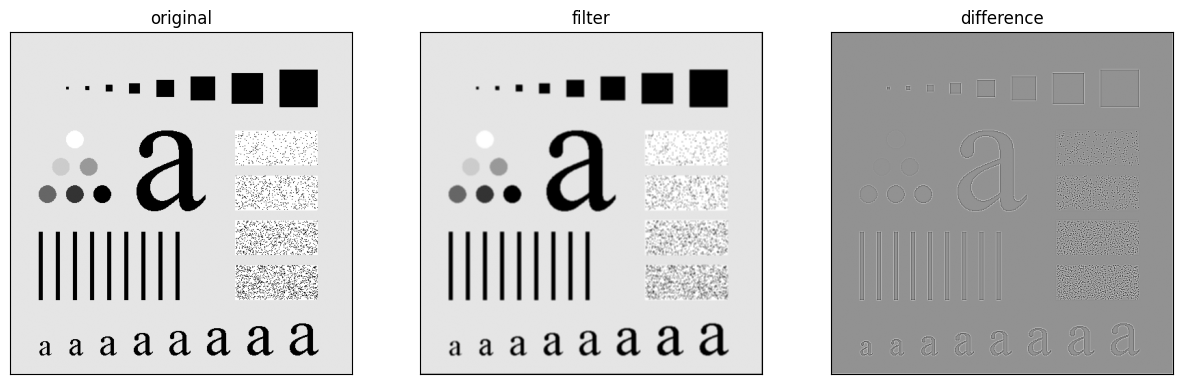

In [2]:
board = cv2.imread("plansza.png", cv2.IMREAD_GRAYSCALE)
board_2Dfilter = signal.convolve2d(board, np.ones((3, 3)) / 9, mode="same")
board_diff = board - board_2Dfilter

fig, axs = plt.subplots(1, 3, figsize=(15, 15))

axs[0].imshow(board, cmap="gray")
axs[0].set_title("original")
axs[0].set_xticks([])
axs[0].set_yticks([])

axs[1].imshow(board_2Dfilter, cmap="gray")
axs[1].set_title("filter")
axs[1].set_xticks([])
axs[1].set_yticks([])

axs[2].imshow(board_diff, cmap="gray")
axs[2].set_title("difference")
axs[2].set_xticks([])
axs[2].set_yticks([])

plt.show()

5. Na wspólnym rysunku wyświetl wyniki filtracji uśredniającej z oknem o rozmiarze 3, 5, 9, 15 i 35.
Wykorzystaj polecenie `plt.subplot`.
Przeanalizuj wpływ rozmiaru maski na wynik.

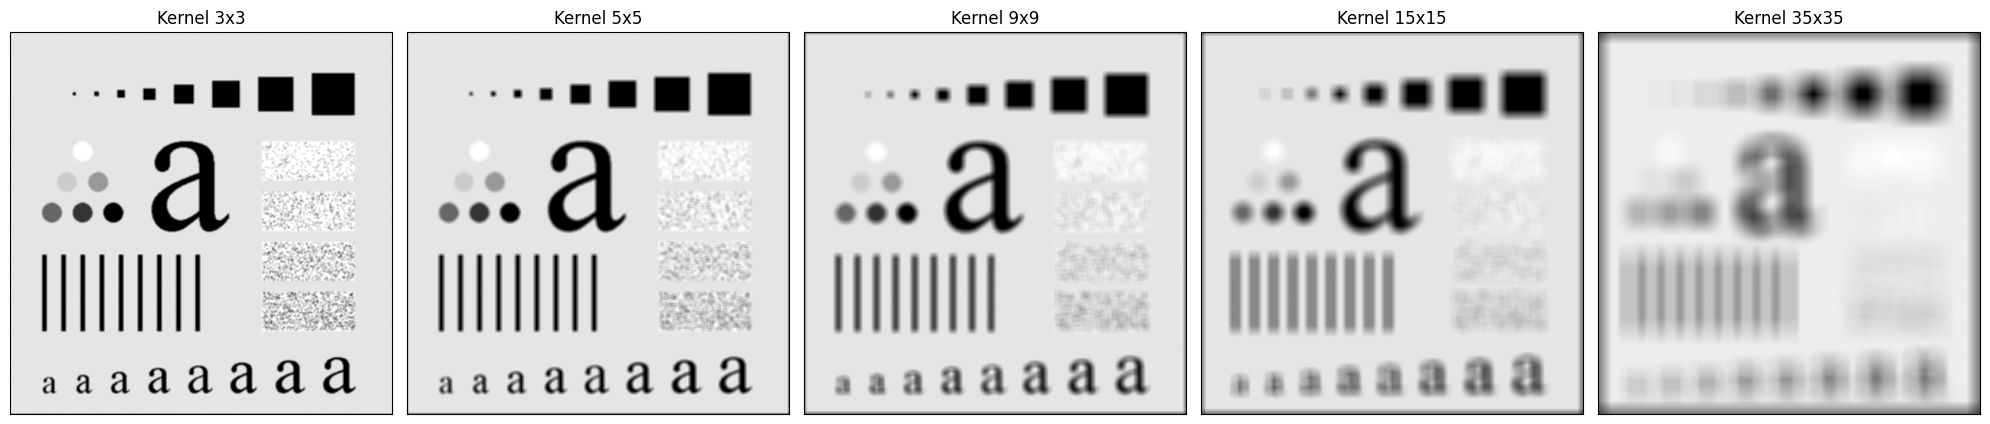

In [6]:
kernel_sizes = [3, 5, 9, 15, 35]

plt.figure(figsize=(20, 10))

for i, size in enumerate(kernel_sizes):
    kernel = np.ones((size, size)) / (size * size)
    board_2Dfilter = signal.convolve2d(board, kernel, mode="same")

    plt.subplot(1, len(kernel_sizes), i + 1)
    plt.imshow(board_2Dfilter, cmap='gray')
    plt.title(f'Kernel {size}x{size}')
    plt.xticks([])
    plt.yticks([])

plt.tight_layout()
plt.show()

6. Wczytaj obraz _lena.png_.
Zaobserwuj efekty filtracji dolnoprzepustowej dla obrazu rzeczywistego.

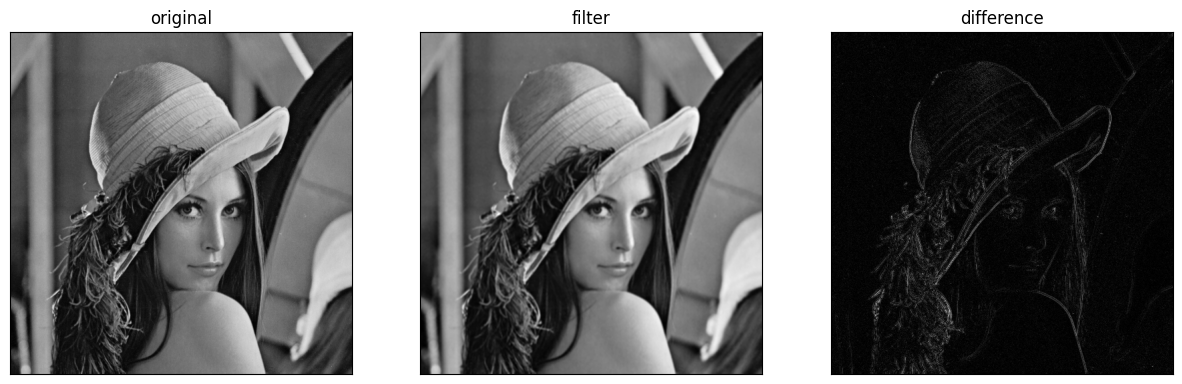

In [7]:
lena = cv2.imread("lena.png", cv2.IMREAD_GRAYSCALE)

M = np.ones((3, 3), dtype=np.float32) / 9
lena_2Dfilter = cv2.filter2D(lena, -1, M)
lena_diff = cv2.absdiff(lena, lena_2Dfilter)

fig, axs = plt.subplots(1, 3, figsize=(15, 15))

axs[0].imshow(lena, cmap="gray")
axs[0].set_title("original")
axs[0].set_xticks([])
axs[0].set_yticks([])

axs[1].imshow(lena_2Dfilter, cmap="gray")
axs[1].set_title("filter")
axs[1].set_xticks([])
axs[1].set_yticks([])

axs[2].imshow(lena_diff, cmap="gray")
axs[2].set_title("difference")
axs[2].set_xticks([])
axs[2].set_yticks([])

plt.show()

7. Niekorzystny efekt towarzyszący wykonanym filtracjom dolnoprzepustowym to utrata ostrości.
Częściowo można go zniwelować poprzez odpowiedni dobór maski.
Wykorzystaj maskę:  `M = np.array([1 2 1; 2 4 2; 1 2 1])`.
Przed obliczeniami należy jeszcze wykonać normalizację - podzielić każdy element maski przez sumę wszystkich elementów: `M = M/sum(sum(M));`.
Tak przygotowaną maskę wykorzystaj w konwolucji - wyświetl wyniki tak jak wcześniej.
Możliwe jest też wykorzystywanie innych masek - współczynniki można dopasowywać do konkretnego problemu.

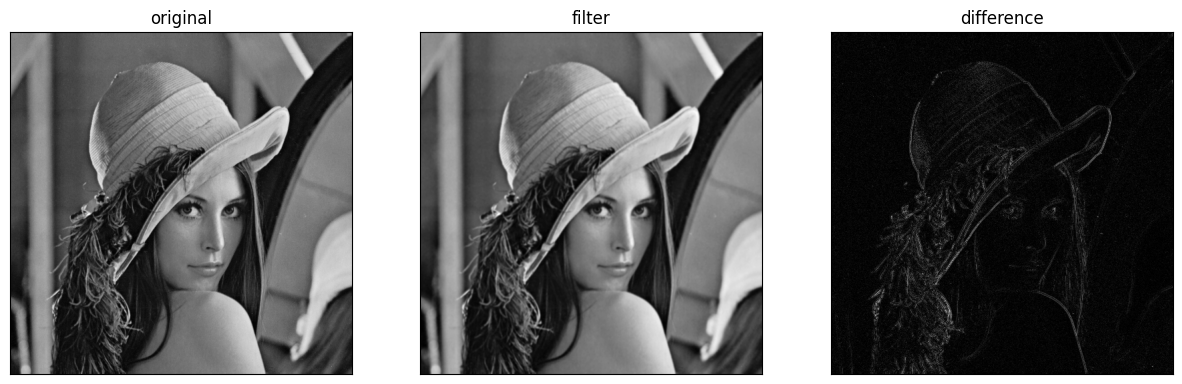

In [8]:
M = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]])
M = np.array(M) / np.sum(M)

lena_2Dfilter = cv2.filter2D(lena, -1, M)
lena_diff = cv2.absdiff(lena, lena_2Dfilter)

fig, axs = plt.subplots(1, 3, figsize=(15, 15))

axs[0].imshow(lena, cmap="gray")
axs[0].set_title("original")
axs[0].set_xticks([])
axs[0].set_yticks([])

axs[1].imshow(lena_2Dfilter, cmap="gray")
axs[1].set_title("filter")
axs[1].set_xticks([])
axs[1].set_yticks([])

axs[2].imshow(lena_diff, cmap="gray")
axs[2].set_title("difference")
axs[2].set_xticks([])
axs[2].set_yticks([])

plt.show()

8. Skuteczną i często wykorzystywaną maską jest tzw. maska Gasussa.
Jest to zbiór liczb, które aproksymują dwuwymiarowy rozkład Gaussa.
Parametrem jest odchylenie standardowe i rozmiar maski.

9. Wykorzystując przygotowaną funkcję `fgaussian` stwórz maskę o rozmiarze $5 \times 5$ i odchyleniu standardowym 0.5.
  Wykorzystując funkcję `mesh` zwizualizuj filtr.
  Sprawdź jak parametr ``odchylenie standardowe'' wpływa na ``kształt'' filtru.

  Uwaga. W OpenCV dostępna jest *dedykowana* funkcja do filtracji Gaussa - `GaussianBlur`.
  Proszę na jednym przykładzie porównać jej działanie z użytym wyżej rozwiązaniem.

10. Wykonaj filtrację dla wybranych (2--3) wartości odchylenia standardowego.


In [9]:
def fgaussian(size, sigma):
     m = n = size
     h, k = m//2, n//2
     x, y = np.mgrid[-h:h+1, -k:k+1]
     g = np.exp(-(x**2 + y**2)/(2*sigma**2))
     return g /g.sum()


def mesh(fun, size):
    fig = plt.figure()
    ax = fig.add_subplot(projection = '3d')


    X = np.arange(-size//2, size//2, 1)
    Y = np.arange(-size//2, size//2, 1)
    X, Y = np.meshgrid(X, Y)
    Z = fun

    ax.plot_surface(X, Y, Z)

    plt.show()

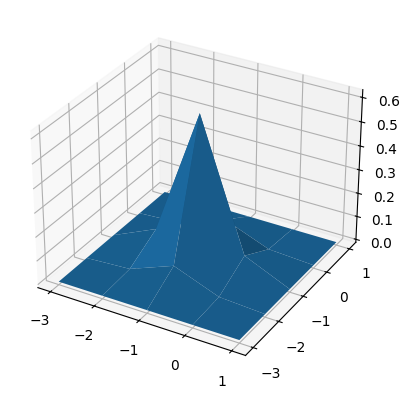

In [10]:
mask = fgaussian(5, 0.5)
mesh(mask, 5)

Sigma 1


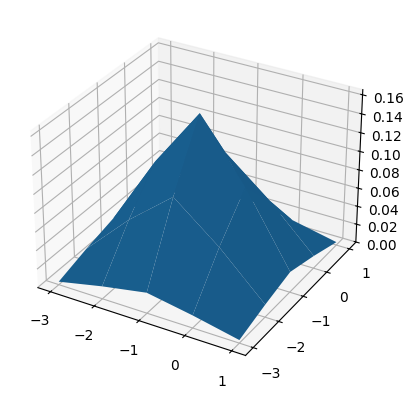

Sigma 1.5


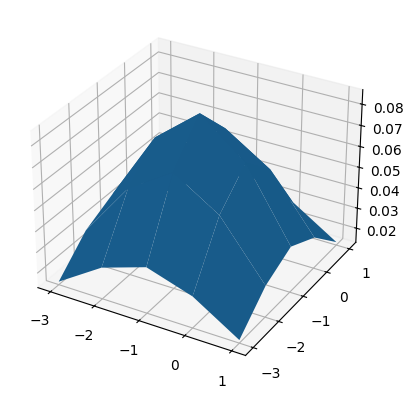

Sigma 2


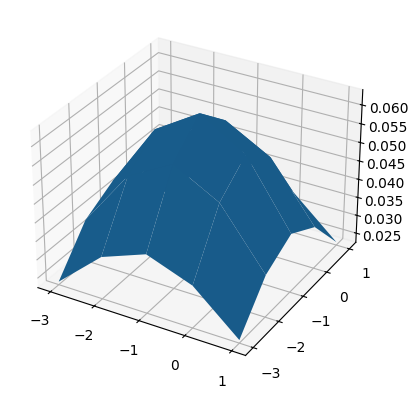

In [11]:
for sigma in [1, 1.5, 2]:
    print(f"Sigma {sigma}")
    mask = fgaussian(5, sigma)
    mesh(mask, 5)

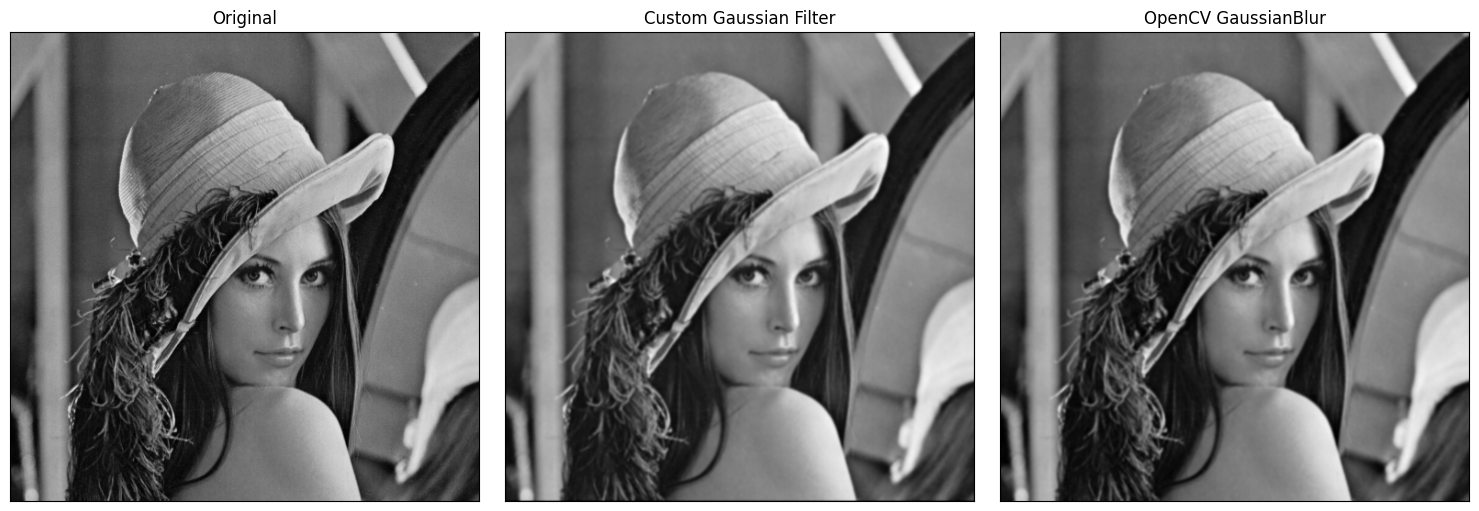

In [12]:
kernel_size = 5
sigma = 1
gaussian_kernel = fgaussian(kernel_size, sigma)

lena_filtered_custom = signal.convolve2d(lena, gaussian_kernel, mode='same')

lena_filtered_opencv = cv2.GaussianBlur(lena, (kernel_size, kernel_size), sigma)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.imshow(lena, cmap='gray')
plt.title("Original")
plt.xticks([])
plt.yticks([])

plt.subplot(1, 3, 2)
plt.imshow(lena_filtered_custom, cmap='gray')
plt.title("Custom Gaussian Filter")
plt.xticks([])
plt.yticks([])

plt.subplot(1, 3, 3)
plt.imshow(lena_filtered_opencv, cmap='gray')
plt.title("OpenCV GaussianBlur")
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

### Filtry nieliniowe -- mediana

Filtry rozmywające redukują szum, ale niekorzystnie wpływają na ostrość obrazu.
Dlatego często wykorzystuje się filtry nieliniowe - np. filtr medianowy (dla przypomnienia: mediana - środkowa wartość w posortowanym ciągu liczb).

Podstawowa różnica pomiędzy filtrami liniowymi, a nieliniowymi polega na tym, że przy filtracji liniowej na nową wartość piksela ma wpływ wartość wszystkich pikseli z otoczenia (np. uśrednianie, czasem ważone), natomiast w przypadku filtracji nieliniowej jako nowy piksel wybierana jest któraś z wartości otoczenia - według jakiegoś wskaźnika (wartość największa, najmniejsza czy właśnie mediana).


1. Wczytaj obraz _lenaSzum.png_ (losowe 10% pikseli białych lub czarnych - tzw. zakłócenia impulsowe). Przeprowadź filtrację uśredniającą z rozmiarem maski 3x3. Wyświetl, podobnie jak wcześniej, oryginał, wynik filtracji i moduł z różnicy. Wykorzystując funkcję ``cv2.medianBlur` wykonaj filtrację medianową _lenaSzum.png_ (z rozmiarem maski $3 \times 3$). Wyświetl, podobnie jak wcześniej, oryginał, wynik filtracji i moduł z różnicy. Która filtracja lepiej radzi sobie z tego typu szumem?

  Uwaga. Taki sam efekt da również użycie funkcji `signal.medfilt2d`.


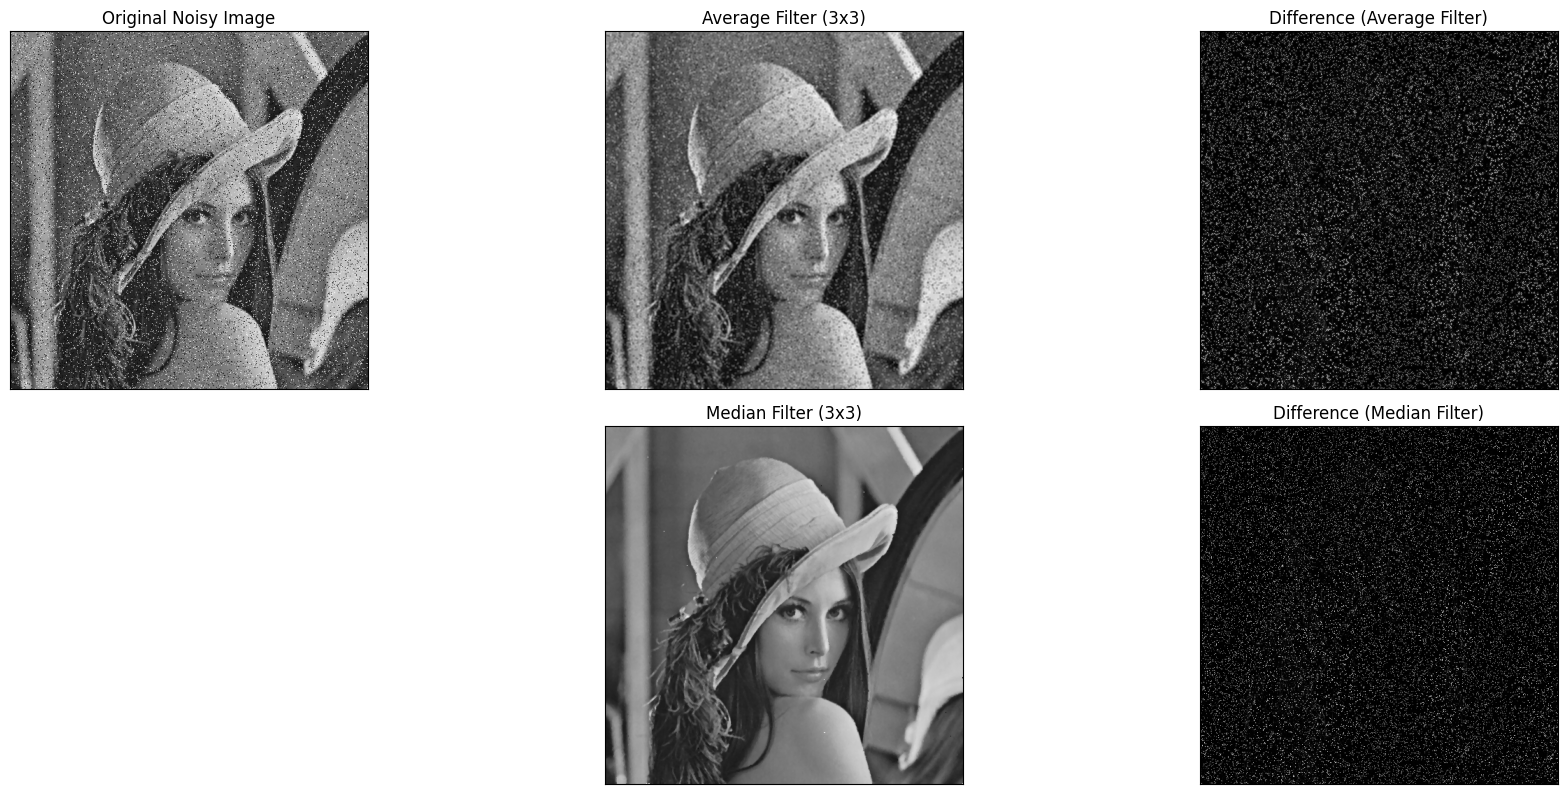

In [13]:
lena_noisy = cv2.imread("lenaSzum.png", cv2.IMREAD_GRAYSCALE)

average_kernel = np.ones((3, 3)) / 9
lena_filtered_avg = cv2.filter2D(lena_noisy, -1, average_kernel)

diff_avg = cv2.absdiff(lena_noisy, lena_filtered_avg)

lena_filtered_median = cv2.medianBlur(lena_noisy, 3)

diff_median = cv2.absdiff(lena_noisy, lena_filtered_median)

plt.figure(figsize=(18, 12))

plt.subplot(3, 3, 1)
plt.imshow(lena_noisy, cmap='gray')
plt.title("Original Noisy Image")
plt.xticks([])
plt.yticks([])

plt.subplot(3, 3, 2)
plt.imshow(lena_filtered_avg, cmap='gray')
plt.title("Average Filter (3x3)")
plt.xticks([])
plt.yticks([])

plt.subplot(3, 3, 3)
plt.imshow(diff_avg, cmap='gray')
plt.title("Difference (Average Filter)")
plt.xticks([])
plt.yticks([])

plt.subplot(3, 3, 5)
plt.imshow(lena_filtered_median, cmap='gray')
plt.title("Median Filter (3x3)")
plt.xticks([])
plt.yticks([])

plt.subplot(3, 3, 6)
plt.imshow(diff_median, cmap='gray')
plt.title("Difference (Median Filter)")
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

2. Przeprowadź filtrację uśredniającą, a następnie medianową obrazu _lena.png_.
   Wyniki porównaj - dla obu wyświetl: oryginał, wynik filtracji i moduł z różnicy.
   Szczególną uwagę zwróć na ostrość i krawędzie.
   W której filtracji krawędzie zostają lepiej zachowane?

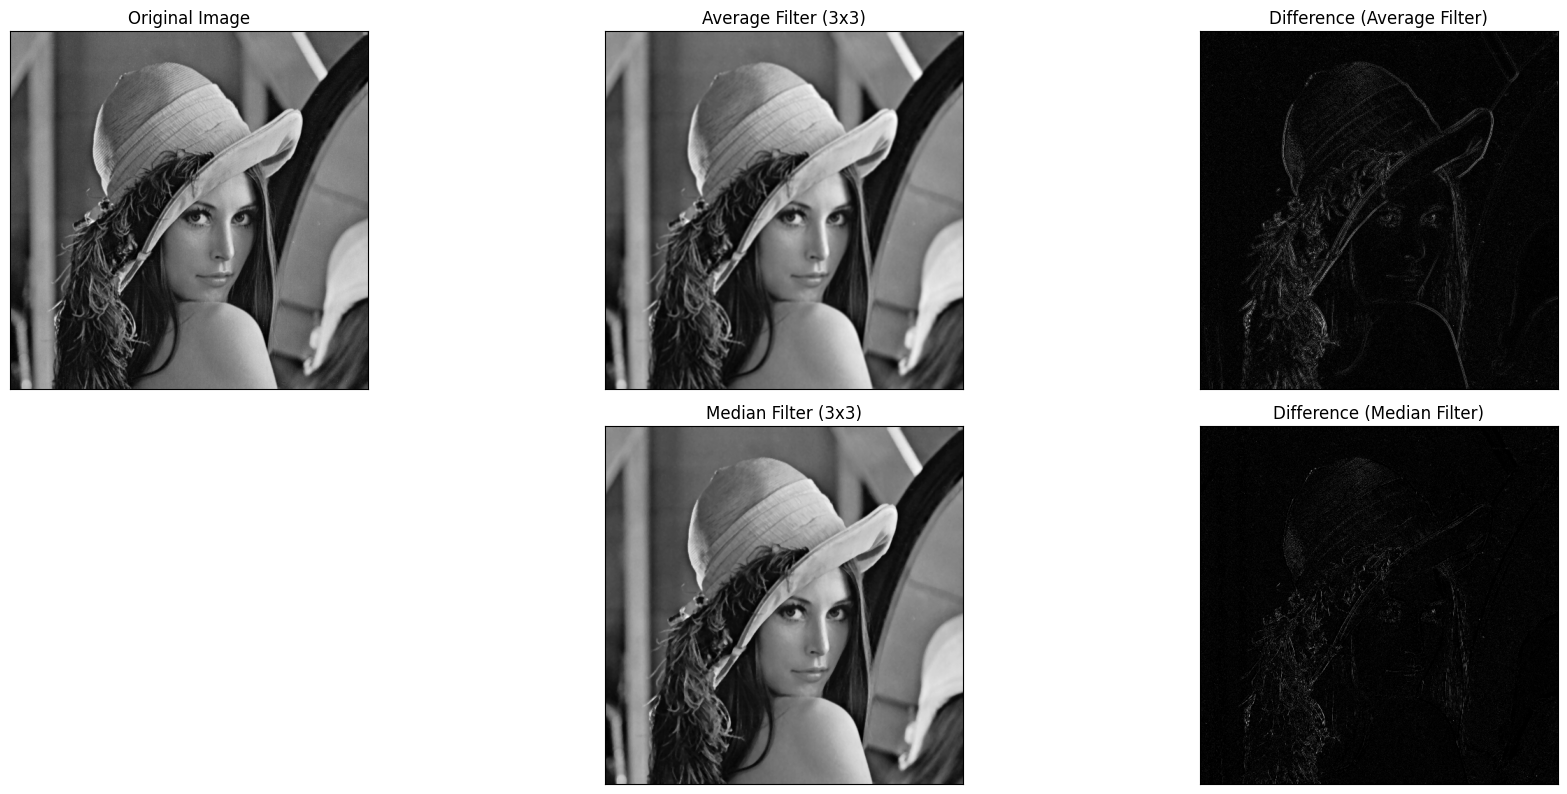

In [14]:
average_kernel = np.ones((3, 3)) / 9
lena_filtered_avg = cv2.filter2D(lena, -1, average_kernel)

diff_avg = cv2.absdiff(lena, lena_filtered_avg)

lena_filtered_median = cv2.medianBlur(lena, 3)

diff_median = cv2.absdiff(lena, lena_filtered_median)

plt.figure(figsize=(18, 12))

plt.subplot(3, 3, 1)
plt.imshow(lena, cmap='gray')
plt.title("Original Image")
plt.xticks([])
plt.yticks([])

plt.subplot(3, 3, 2)
plt.imshow(lena_filtered_avg, cmap='gray')
plt.title("Average Filter (3x3)")
plt.xticks([])
plt.yticks([])

plt.subplot(3, 3, 3)
plt.imshow(diff_avg, cmap='gray')
plt.title("Difference (Average Filter)")
plt.xticks([])
plt.yticks([])

plt.subplot(3, 3, 5)
plt.imshow(lena_filtered_median, cmap='gray')
plt.title("Median Filter (3x3)")
plt.xticks([])
plt.yticks([])

plt.subplot(3, 3, 6)
plt.imshow(diff_median, cmap='gray')
plt.title("Difference (Median Filter)")
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

3. Ciekawy efekt można uzyskać wykonując filtrację medianową wielokrotnie. Określa się go mianem  posteryzacji.  W wyniku przetwarzania z obrazka usunięte zostają detale, a duże obszary uzyskują tą samą wartość jasności.  Wykonaj operację mediany $5 \times 5$ na obrazie _lena.png_ 10-krotnie. (wykorzystaj np. pętlę `for`).


Inne filtry nieliniowe:
- filtr modowy - moda (dominanta) zamiast mediany,
- filtr olimpijski - średnia z podzbioru otoczenia (bez wartości ekstremalnych),
- hybrydowy filtr medianowy - mediana obliczana osobno w różnych podzbiorach otoczenia (np. kształt ``x'',``+''), a jako wynik brana jest mediana ze zbioru wartość elementu centralnego, mediana z ``x'' i mediana z ``+'',
- filtr minimalny i maksymalny (będą omówione przy okazji operacji morfologicznych w dalszej części kursu).


Warto zdawać sobie sprawę, z szerokich możliwości dopasowywania rodzaju filtracji do konkretnego rozważanego problemu i rodzaju zaszumienia występującego na obrazie.

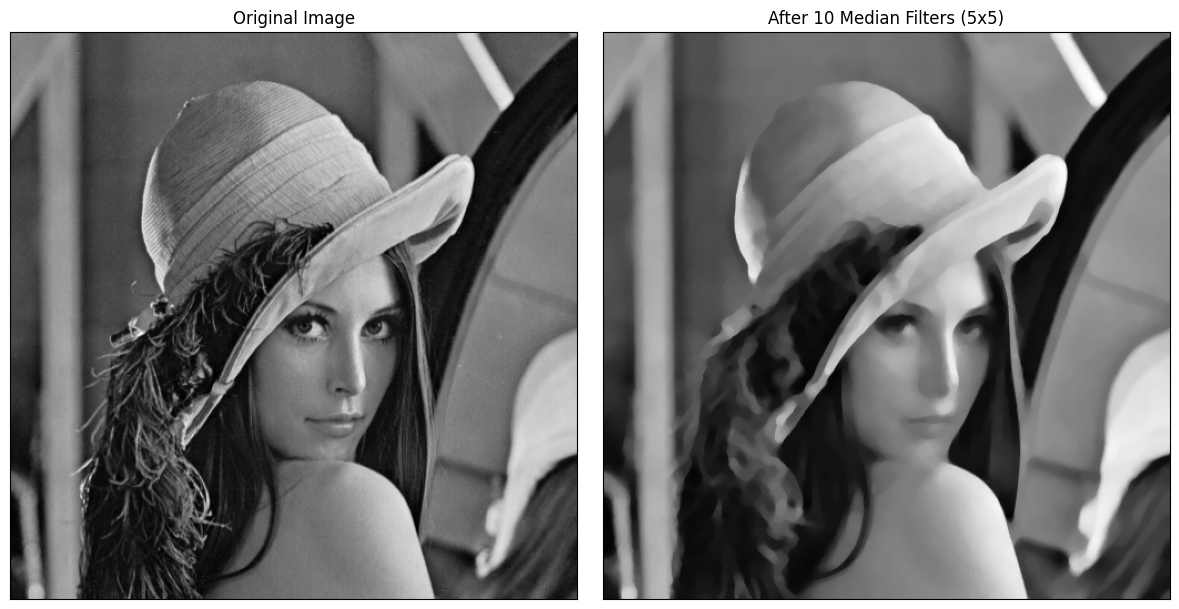

In [15]:
lena_multi_median = lena.copy()
for _ in range(10):
    lena_multi_median = cv2.medianBlur(lena_multi_median, 5)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(lena, cmap='gray')
plt.title("Original Image")
plt.xticks([])
plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(lena_multi_median, cmap='gray')
plt.title("After 10 Median Filters (5x5)")
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

## Filtry liniowe górnoprzepustowe (wyostrzające, wykrywające krawędzie)

Zadaniem filtrów górnoprzepustowych jest wydobywanie z obrazu składników odpowiedzialnych za szybkie zmiany jasności - konturów, krawędzi, drobnych elementów tekstury.

### Laplasjan (wykorzystanie drugiej pochodnej obrazu)

1. Wczytaj obraz _moon.png_.

2. Wprowadź podstawową maskę laplasjanu:
\begin{equation}
M =
\begin{bmatrix}
0 & 1& 0 \\ 1 & -4 & 1 \\ 0 & 1 & 0
\end{bmatrix}
\end{equation}

3. Przed rozpoczęciem obliczeń należy dokonać normalizacji maski - dla rozmiaru $3 \times 3$ podzielić każdy element przez 9.
   Proszę zwrócić uwagę, że nie można tu zastosować takiej samej normalizacji, jak dla filtrów dolnoprzepustowanych, gdyż skutkowałby to dzieleniem przez 0.

4. Wykonaj konwolucję obrazu z maską (`c2.filter2D`). Przed wyświetleniem, wynikowy obraz należy poddać normalizacji (występują ujemne wartości). Najczęściej wykonuje się jedną z dwóch operacji:
- skalowanie (np. poprzez dodatnie 128 do każdego z pikseli),
- moduł (wartość bezwzględna).

Wykonaj obie normalizacje.
Na wspólnym wykresie wyświetl obraz oryginalny oraz przefiltrowany po obu normalizacjach.

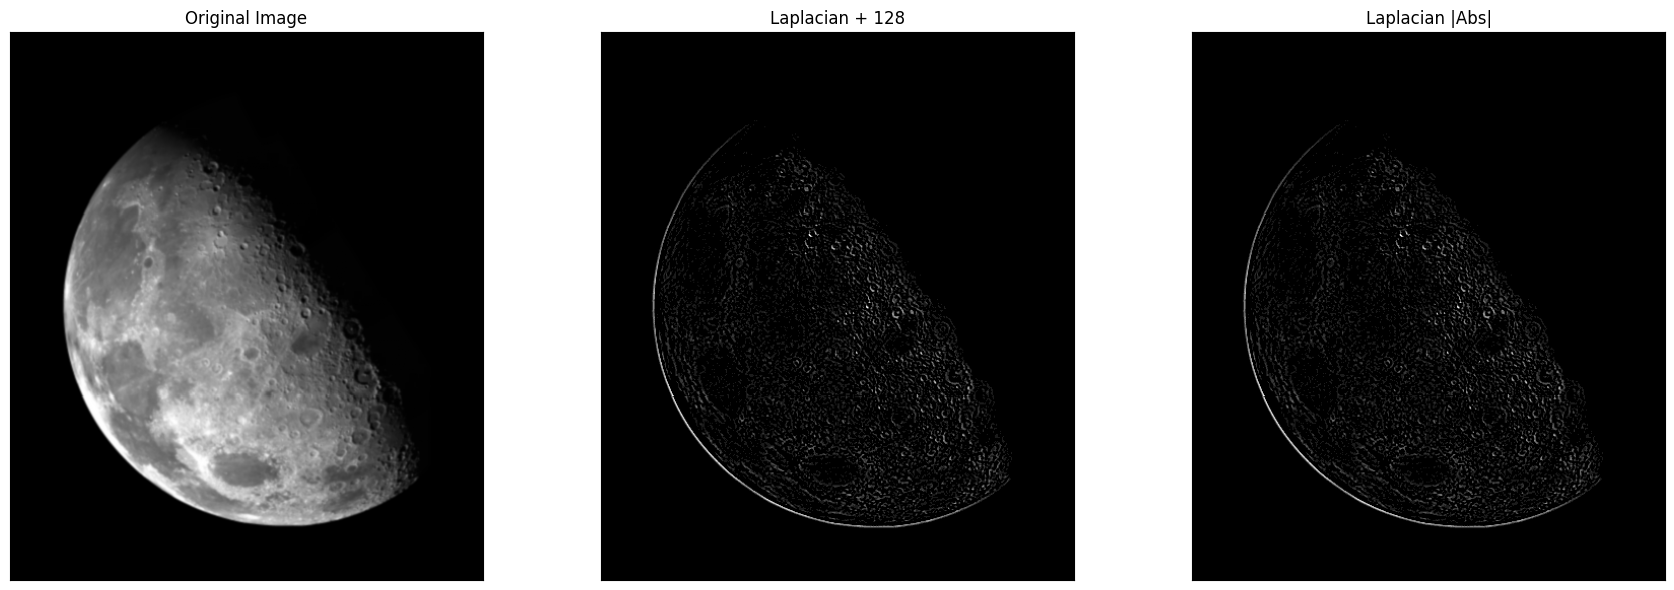

In [16]:
moon = cv2.imread("moon.png", cv2.IMREAD_GRAYSCALE)

laplacian_mask = np.array([[0, 1, 0],
                           [1, -4, 1],
                           [0, 1, 0]], dtype=np.float32) / 9

laplacian_filtered = cv2.filter2D(moon, -1, laplacian_mask)

laplacian_scaled = laplacian_filtered + 128
laplacian_scaled_normalized = np.clip(laplacian_scaled, 0, 255).astype(np.uint8)

laplacian_abs = np.abs(laplacian_filtered)
laplacian_abs_normalized = np.clip(laplacian_abs, 0, 255).astype(np.uint8)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(moon, cmap='gray')
plt.title("Original Image")
plt.xticks([])
plt.yticks([])

plt.subplot(1, 3, 2)
plt.imshow(laplacian_scaled_normalized, cmap='gray')
plt.title("Laplacian + 128")
plt.xticks([])
plt.yticks([])

plt.subplot(1, 3, 3)
plt.imshow(laplacian_abs_normalized, cmap='gray')
plt.title("Laplacian |Abs|")
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

7. Efekt wyostrzenia uzyskuje się po odjęciu/dodaniu (zależy do maski) rezultatu filtracji laplasjanowej i oryginalnego obrazu. Wyświetl na jednym wykresie: obraz oryginalny, sumę oryginału i wyniku filtracji oraz różnicę (bezwzględną) oryginału i wyniku filtracji.
 Uwaga. Aby uniknąć artefaktów, należy obraz wejściowy przekonwertować do formatu ze znakiem.



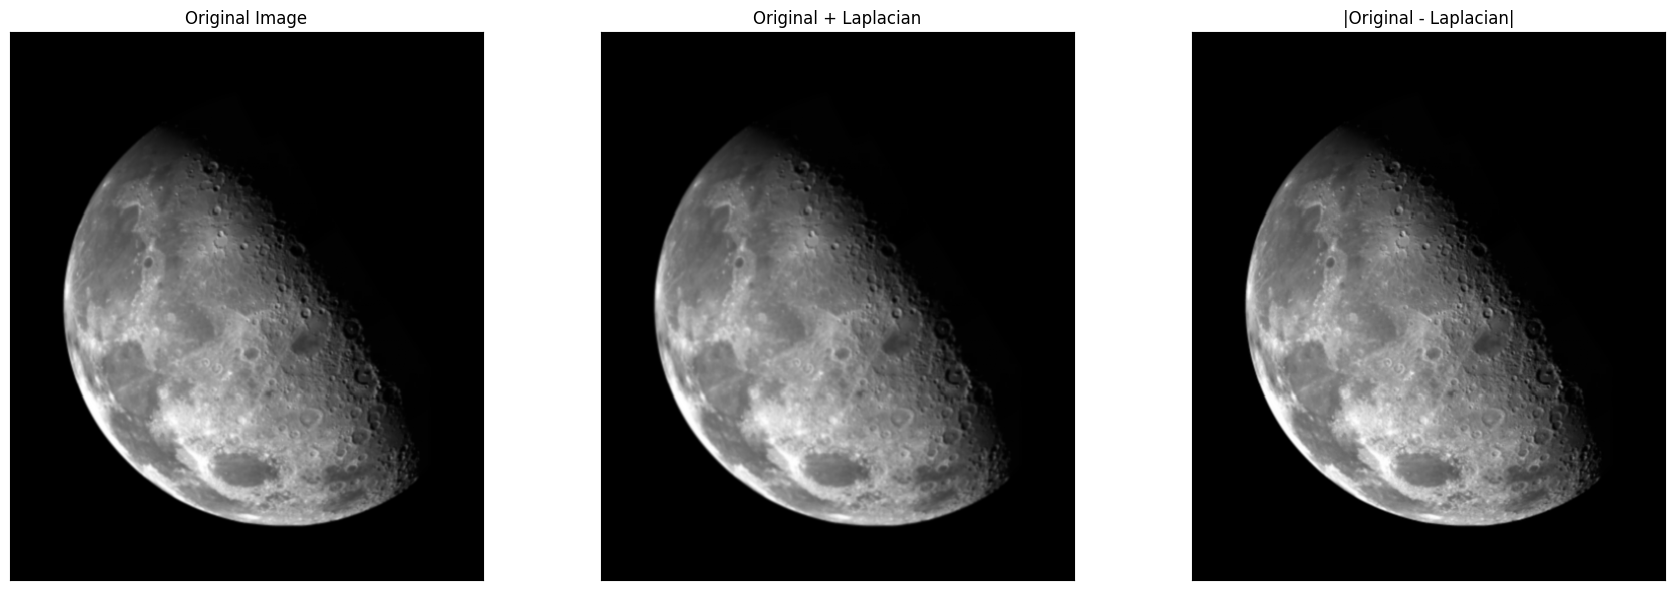

In [17]:
moon = cv2.imread("moon.png", cv2.IMREAD_GRAYSCALE).astype(np.int16)

laplacian_filtered = cv2.filter2D(moon, -1, laplacian_mask)

sharp_add = moon + laplacian_filtered
sharp_add_normalized = np.clip(sharp_add, 0, 255).astype(np.uint8)

sharp_diff = np.abs(moon - laplacian_filtered)
sharp_diff_normalized = np.clip(sharp_diff, 0, 255).astype(np.uint8)

plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
plt.imshow(moon.astype(np.uint8), cmap='gray')
plt.title("Original Image")
plt.xticks([])
plt.yticks([])

plt.subplot(1, 3, 2)
plt.imshow(sharp_add_normalized, cmap='gray')
plt.title("Original + Laplacian")
plt.xticks([])
plt.yticks([])

plt.subplot(1, 3, 3)
plt.imshow(sharp_diff_normalized, cmap='gray')
plt.title("|Original - Laplacian|")
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

### Gradienty (wykorzystanie pierwszej pochodnej obrazu)

1. Wczytaj obraz _kw.png_. Stwórz odpowiednie maski opisane w kolejnych punktach i dokonaj filtracji.
2. Wykorzystując gradient Robertsa przeprowadź detekcję krawędzi - poprzez wykonanie konwolucji obrazu z daną maską:
\begin{equation}
R1 = \begin{bmatrix} 0 & 0 & 0 \\ -1 & 0 & 0 \\ 0 & 1 & 0 \end{bmatrix}   
R2 = \begin{bmatrix} 0 & 0 & 0 \\ 0 & 0 & -1 \\ 0 & 1 & 0 \end{bmatrix}
\end{equation}

Wykorzystaj stworzony wcześniej kod (przy laplasjanie) - dwie metody normalizacji oraz sposób wyświetlania.

3. Analogicznie przeprowadź detekcję krawędzi za pomocą gradientu Prewitta (pionowy i poziomy)
\begin{equation}
P1 = \begin{bmatrix} -1 & 0 & 1 \\ -1 & 0 & 1 \\ -1 & 0 & 1 \end{bmatrix}   
P2 = \begin{bmatrix} -1 & -1 & -1 \\ 0 & 0 & 0 \\ 1 & 1 & 1 \end{bmatrix}
\end{equation}

4. Podobnie skonstruowany jest gradient Sobela (występuje osiem masek, zaprezentowane są dwie ``prostopadłe''):
\begin{equation}
S1 = \begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix}   
S2 = \begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{bmatrix}
\end{equation}

Przeprowadź detekcję krawędzi za pomocą gradientu Sobela.

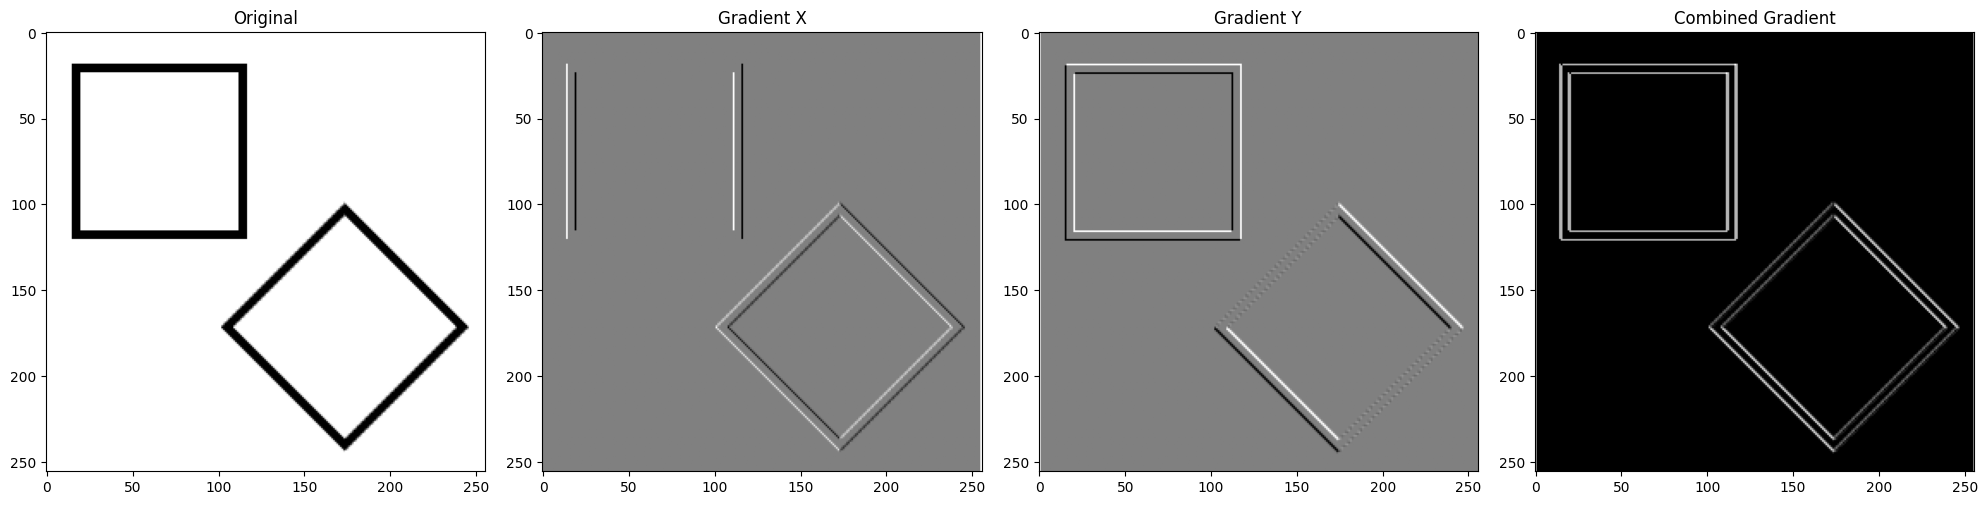

In [18]:
kw = cv2.imread("kw.png", cv2.IMREAD_GRAYSCALE).astype(np.int16)

R1 = np.array([[0, 0, 0], [-1, 1, 0], [0, 0, 0]])
R2 = np.array([[0, 0, 0], [0, 0, -1], [0, 1, 0]])

image_Rx = signal.convolve2d(kw, R1, mode="same")
image_Ry = signal.convolve2d(kw, R2, mode="same")

gradient_magnitude = np.sqrt(image_Rx**2 + image_Ry**2)

image_normalized_scaled = (gradient_magnitude - np.min(gradient_magnitude)) / (np.max(gradient_magnitude) - np.min(gradient_magnitude))

image_abs = np.abs(gradient_magnitude)

fig, axs = plt.subplots(1, 4, figsize=(20, 15))
axs[0].imshow(kw, cmap="gray")
axs[0].set_title("Original")
axs[1].imshow(image_Rx, cmap="gray")
axs[1].set_title("Gradient X")
axs[2].imshow(image_Ry, cmap="gray")
axs[2].set_title("Gradient Y")
axs[3].imshow(image_normalized_scaled, cmap="gray")
axs[3].set_title("Combined Gradient")

plt.tight_layout()
plt.show()

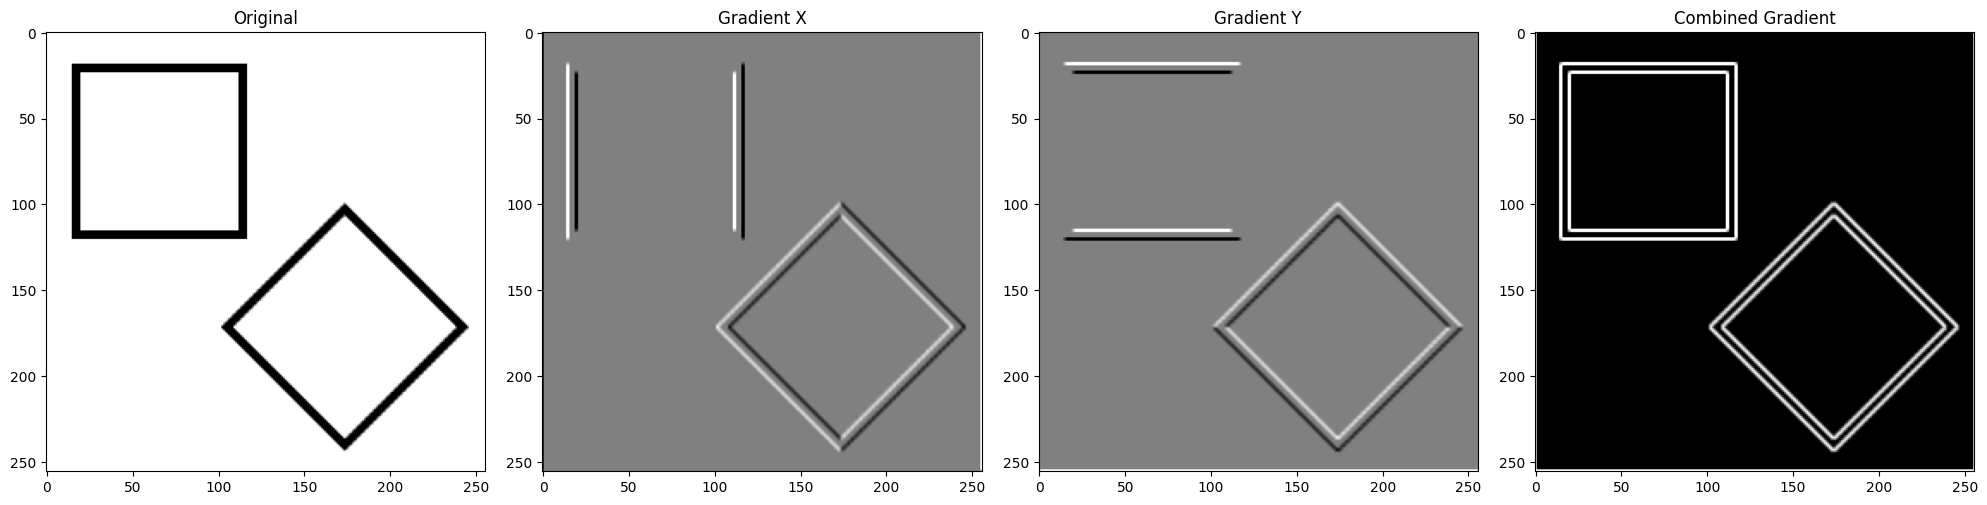

In [19]:
P1 = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
P2 = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

image_Rx = signal.convolve2d(kw, P1, mode="same")
image_Ry = signal.convolve2d(kw, P2, mode="same")

gradient_magnitude = np.sqrt(image_Rx**2 + image_Ry**2)

image_normalized_scaled = (gradient_magnitude - np.min(gradient_magnitude)) / (np.max(gradient_magnitude) - np.min(gradient_magnitude))

image_abs = np.abs(gradient_magnitude)

fig, axs = plt.subplots(1, 4, figsize=(20, 15))
axs[0].imshow(kw, cmap="gray")
axs[0].set_title("Original")
axs[1].imshow(image_Rx, cmap="gray")
axs[1].set_title("Gradient X")
axs[2].imshow(image_Ry, cmap="gray")
axs[2].set_title("Gradient Y")
axs[3].imshow(image_normalized_scaled, cmap="gray")
axs[3].set_title("Combined Gradient")

plt.tight_layout()
plt.show()

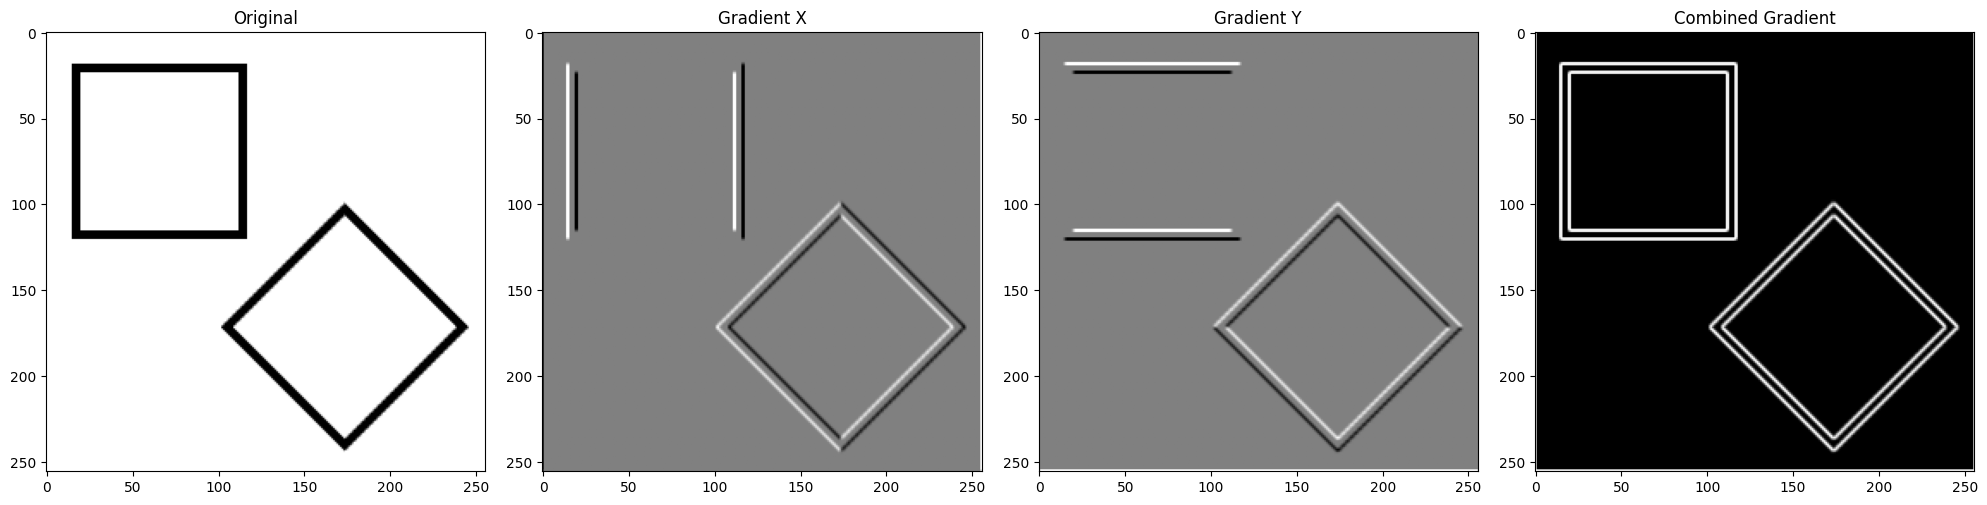

In [20]:
S1 = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
S2 = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

image_Rx = signal.convolve2d(kw, S1, mode="same")
image_Ry = signal.convolve2d(kw, S2, mode="same")

gradient_magnitude = np.sqrt(image_Rx**2 + image_Ry**2)

image_normalized_scaled = (gradient_magnitude - np.min(gradient_magnitude)) / (np.max(gradient_magnitude) - np.min(gradient_magnitude))

image_abs = np.abs(gradient_magnitude)

fig, axs = plt.subplots(1, 4, figsize=(20, 15))
axs[0].imshow(kw, cmap="gray")
axs[0].set_title("Original")
axs[1].imshow(image_Rx, cmap="gray")
axs[1].set_title("Gradient X")
axs[2].imshow(image_Ry, cmap="gray")
axs[2].set_title("Gradient Y")
axs[3].imshow(image_normalized_scaled, cmap="gray")
axs[3].set_title("Combined Gradient")

plt.tight_layout()
plt.show()

5. Na podstawie dwóch ortogonalnych masek np. Sobela można stworzyć tzw. filtr kombinowany - pierwiastek kwadratowy z sumy kwadratów gradientów:
\begin{equation}
OW = \sqrt{(O * S1)^2 + (O * S2)^2}
\end{equation}
gdzie:  $OW$ - obraz wyjściowy, $O$ - obraz oryginalny (wejściowy), $S1,S2$ - maski Sobela, $*$ - operacja konwolucji.

Zaimplementuj filtr kombinowany.

Uwaga. Proszę zwrócić uwagę na konieczność zmiany formatu danych obrazu wejściowego - na typ znakiem



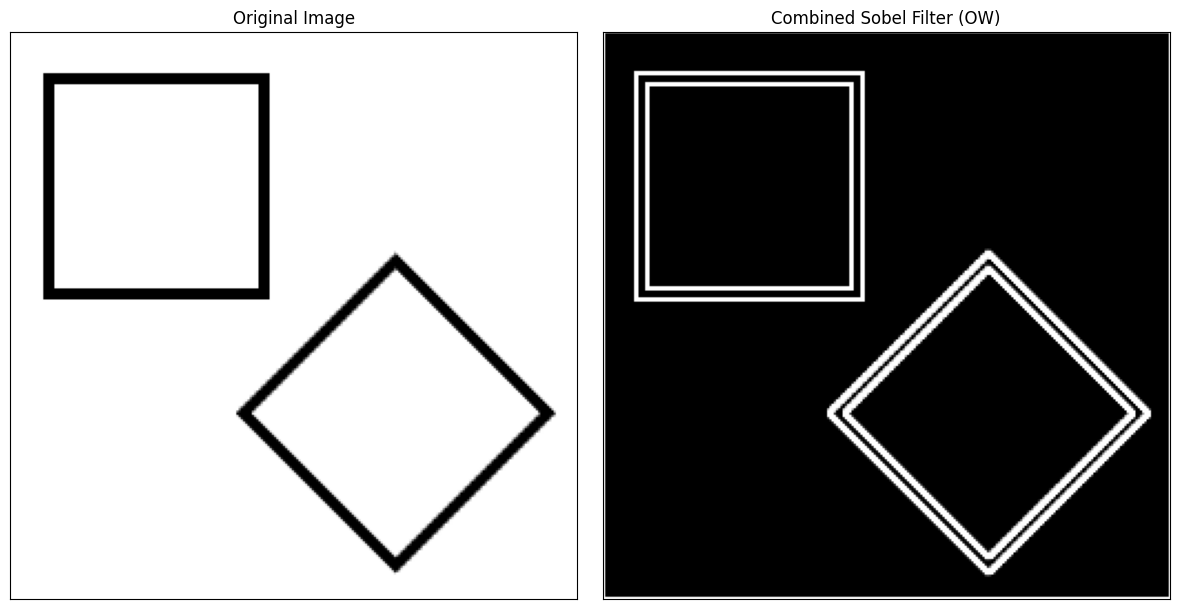

In [21]:
S1 = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
S2 = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)

kw_filtered_S1 = signal.convolve2d(kw, S1, mode="same")
kw_filtered_S2 = signal.convolve2d(kw, S2, mode="same")

combined_filter = np.sqrt(kw_filtered_S1**2 + kw_filtered_S2**2)

combined_filter_normalized = np.clip(combined_filter, 0, 255).astype(np.uint8)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(kw.astype(np.uint8), cmap='gray')
plt.title("Original Image")
plt.xticks([])
plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(combined_filter_normalized, cmap='gray')
plt.title("Combined Sobel Filter (OW)")
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

6. Istnieje alternatywna wersja filtra kombinowanego, która zamiast pierwiastka z sumy kwadratów wykorzystuje sumę modułów (prostsze obliczenia).
Zaimplementuj tę wersję.

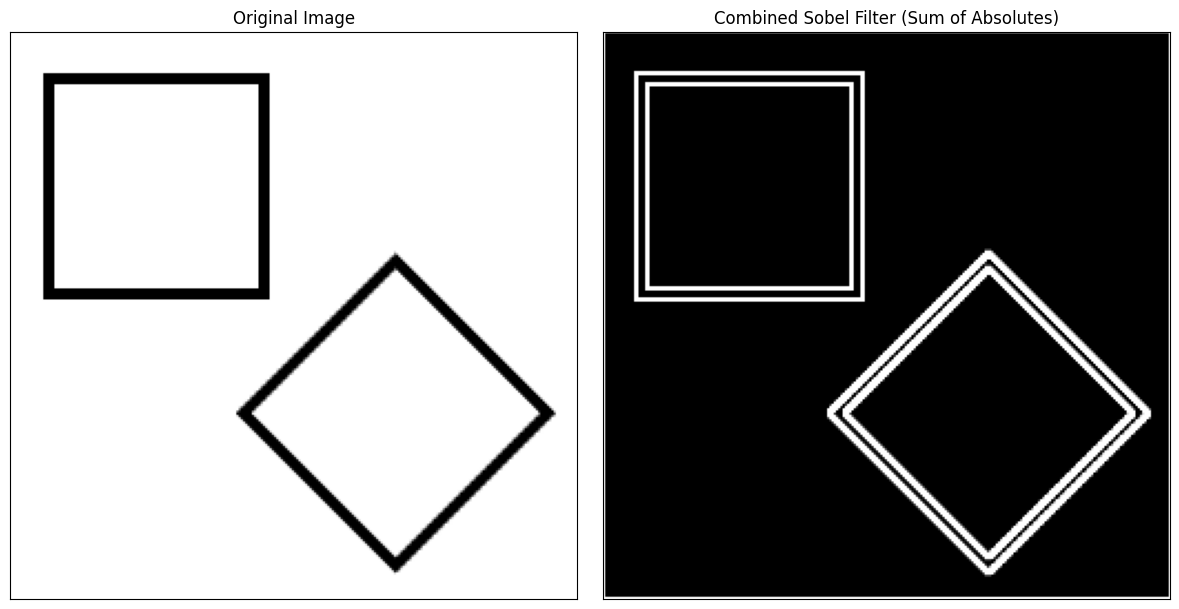

In [22]:
S1 = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
S2 = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)

kw_filtered_S1 = signal.convolve2d(kw, S1, mode="same")
kw_filtered_S2 = signal.convolve2d(kw, S2, mode="same")

combined_filter = np.abs(kw_filtered_S1) + np.abs(kw_filtered_S2)

combined_filter_normalized = np.clip(combined_filter, 0, 255).astype(np.uint8)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(kw.astype(np.uint8), cmap='gray')
plt.title("Original Image")
plt.xticks([])
plt.yticks([])

plt.subplot(1, 2, 2)
plt.imshow(combined_filter_normalized, cmap='gray')
plt.title("Combined Sobel Filter (Sum of Absolutes)")
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

7. Wczytaj plik _jet.png_ (zamiast _kw.png_).
Sprawdź działanie obu wariantów filtracji kombinowanej.

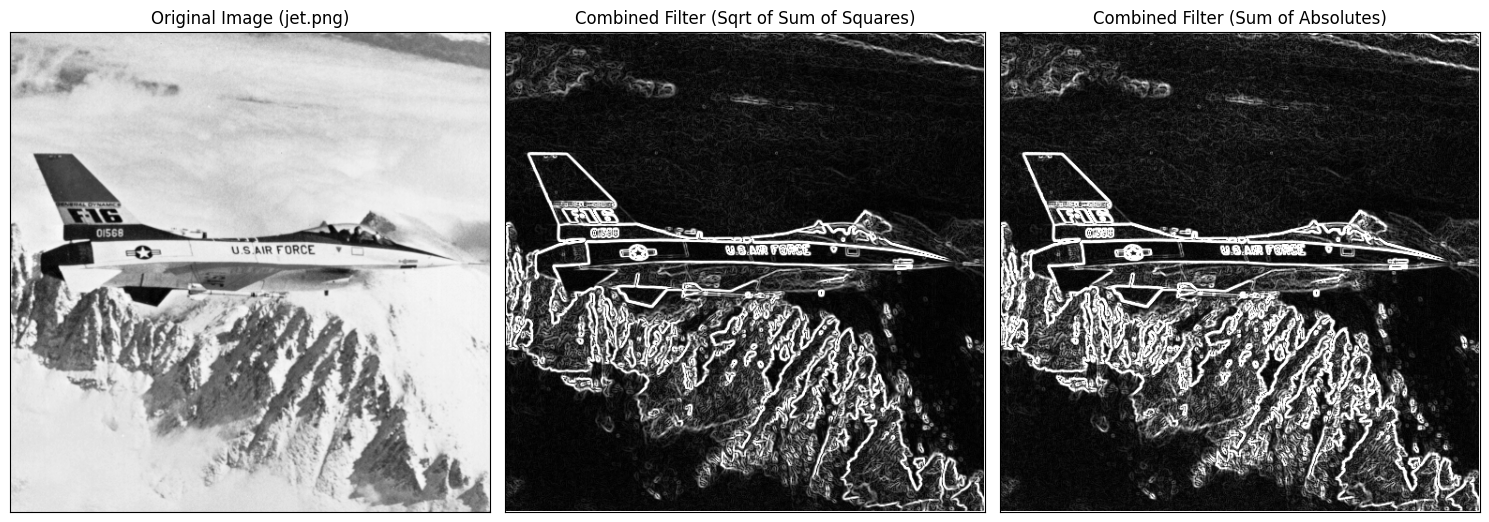

In [23]:
jet = cv2.imread("jet.png", cv2.IMREAD_GRAYSCALE).astype(np.int16)

S1 = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]], dtype=np.float32)
S2 = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]], dtype=np.float32)

jet_filtered_S1 = signal.convolve2d(jet, S1, mode="same")
jet_filtered_S2 = signal.convolve2d(jet, S2, mode="same")

combined_filter_sqrt = np.sqrt(jet_filtered_S1**2 + jet_filtered_S2**2)
combined_filter_sqrt_normalized = np.clip(combined_filter_sqrt, 0, 255).astype(np.uint8)

combined_filter_abs = np.abs(jet_filtered_S1) + np.abs(jet_filtered_S2)
combined_filter_abs_normalized = np.clip(combined_filter_abs, 0, 255).astype(np.uint8)

plt.figure(figsize=(15, 10))

plt.subplot(1, 3, 1)
plt.imshow(jet.astype(np.uint8), cmap='gray')
plt.title("Original Image (jet.png)")
plt.xticks([])
plt.yticks([])

plt.subplot(1, 3, 2)
plt.imshow(combined_filter_sqrt_normalized, cmap='gray')
plt.title("Combined Filter (Sqrt of Sum of Squares)")
plt.xticks([])
plt.yticks([])

plt.subplot(1, 3, 3)
plt.imshow(combined_filter_abs_normalized, cmap='gray')
plt.title("Combined Filter (Sum of Absolutes)")
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()